# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 


# Bryant & Lempert

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/Bryant et al 2010.csv', index_col=None)
x = data.iloc[:, 2:11]
y = data.iloc[:, 15]

y = y.values

In [2]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


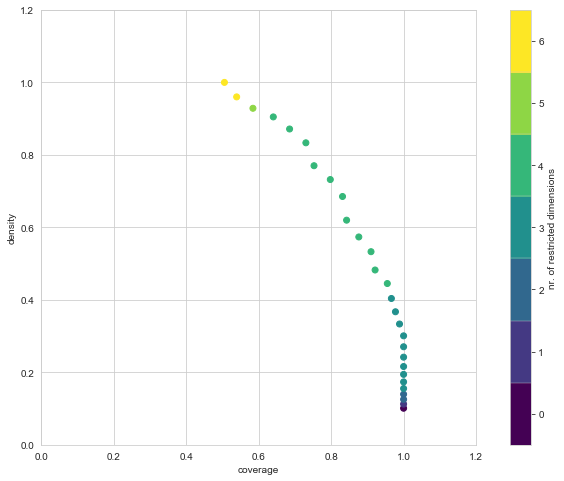

In [3]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

In [4]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.100907,0,1.000000,0.100907,0
1,1.000000,0.112374,1,0.897959,0.112374,1
2,1.000000,0.125352,2,0.804989,0.125352,2
3,1.000000,0.139498,3,0.723356,0.139498,2
4,1.000000,0.155323,4,0.649660,0.155323,3
5,1.000000,0.173489,5,0.581633,0.173489,3
6,1.000000,0.194323,6,0.519274,0.194323,3
7,1.000000,0.216019,7,0.467120,0.216019,3
8,1.000000,0.241848,8,0.417234,0.241848,3
9,1.000000,0.270517,9,0.373016,0.270517,3


coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



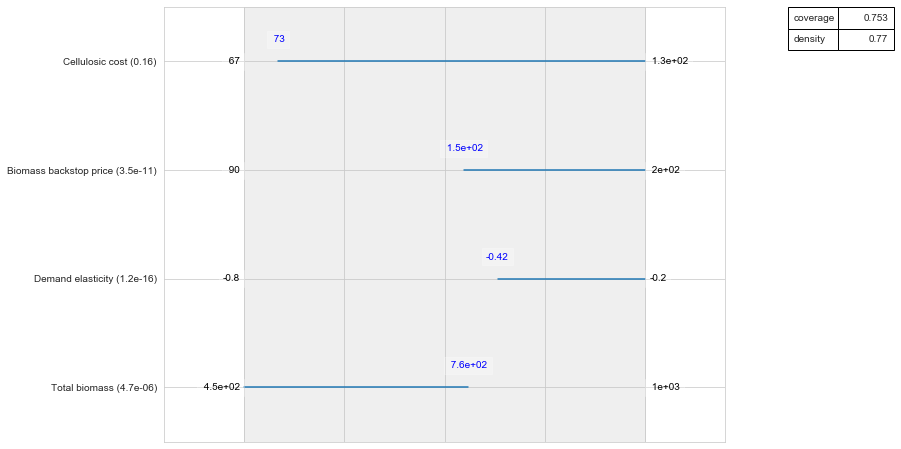

In [4]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

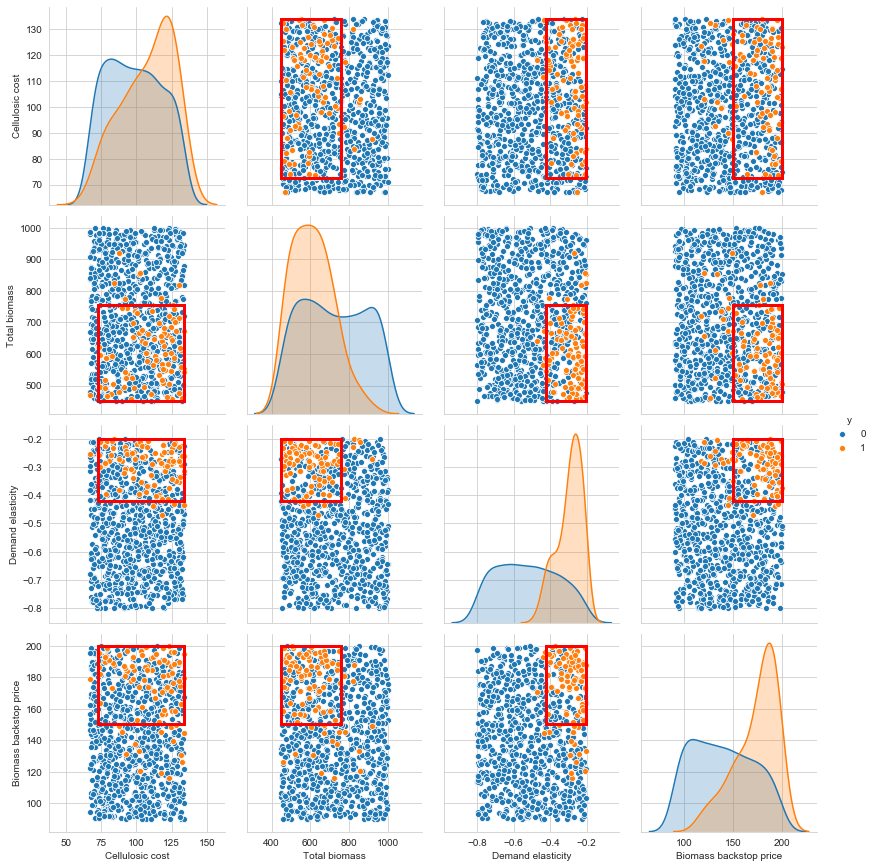

In [5]:
box1.select(21)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# Rozenberg et al
* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM

In [6]:
data = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=None)
x = data.iloc[:, 0:7]
y = data.iloc[:, 7].values # change to higher index for different SSP's

In [7]:
# peel alpha controls the leniency of the algorithm, the higher the less lenient
# the meaning of peel_alpha is the percentile of the data that is to be removed
prim_obj = prim.Prim(x, y, mass_min=0.001, threshold=0.16, 
                     peel_alpha=0.01)
box1 = prim_obj.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.027972027972027972, coverage: 0.18181818181818182, density: 1.0 restricted_dimensions: 4


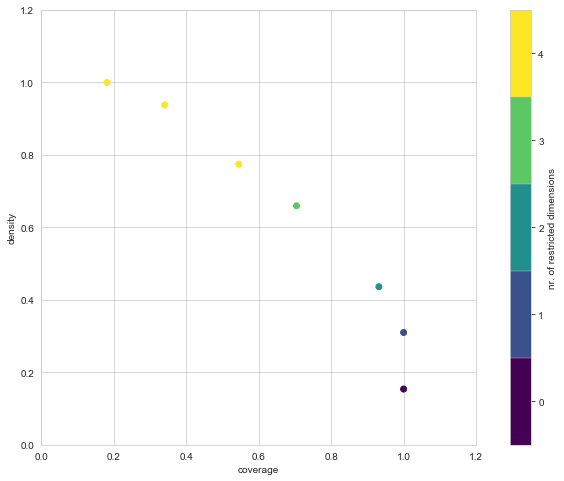

In [8]:
box1.show_tradeoff()
plt.show()

In [9]:
box1.inspect(3)
plt.show()

coverage    0.704545
density     0.659574
id                 3
mass        0.164336
mean        0.659574
res_dim            3
Name: 3, dtype: object

             box 3                                    
               min  max                      qp values
population     0.0  1.0   [-1.0, 0.005972420192480504]
behaviors      1.0  1.0  [1.469768735781625e-06, -1.0]
inequalities   1.0  1.0   [0.000977219127931685, -1.0]



# Hamarat et al

this is the most difficult dataset to analyze with prim. As can be seen by the results, PRIM fails to find a good explanation for why negative outcomes occur. 


In [10]:
from ema_workbench import load_results

results = load_results('./data/Hamarat et al 2013.gz')

[MainProcess/INFO] results loaded succesfully from /Users/jhkwakkel/Documents/workspace/epa1361_open/Week 3-4 - vulnerability analysis/data/Hamarat et al 2013.gz


In [11]:
x, outcomes = results
ooi = outcomes['fraction renewables']
y = ooi[:, -1] < ooi[:, 0]


In [12]:
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box1 = prim_obj.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.732824427480916, mass: 0.0524, coverage: 0.22043628013777267, density: 0.732824427480916 restricted_dimensions: 12


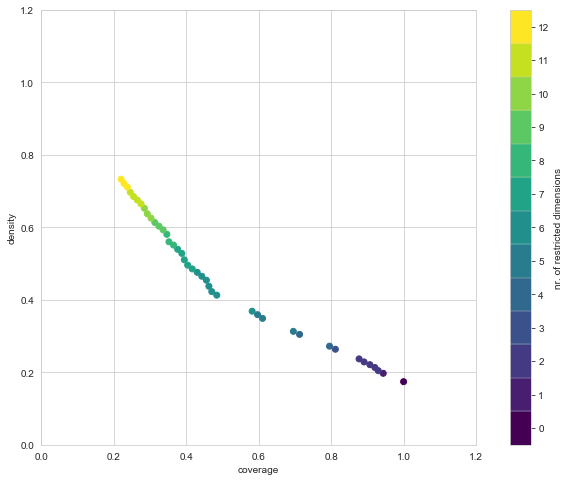

In [13]:
box1.show_tradeoff()
plt.show()

* PRIM struggles with finding a good explanation for this case, why?

The model is highly non-linear and the cases of interest are not nicely located in an orthoganal box. This can also be seen by creating a pairwise scatter plot of the results for any of the boxes on the peeling trajectory.



SWITCH economic growth [1, 2, 5, 3, 4, 6]
SWITCH electrification rate [1, 2, 4, 5, 3, 6]


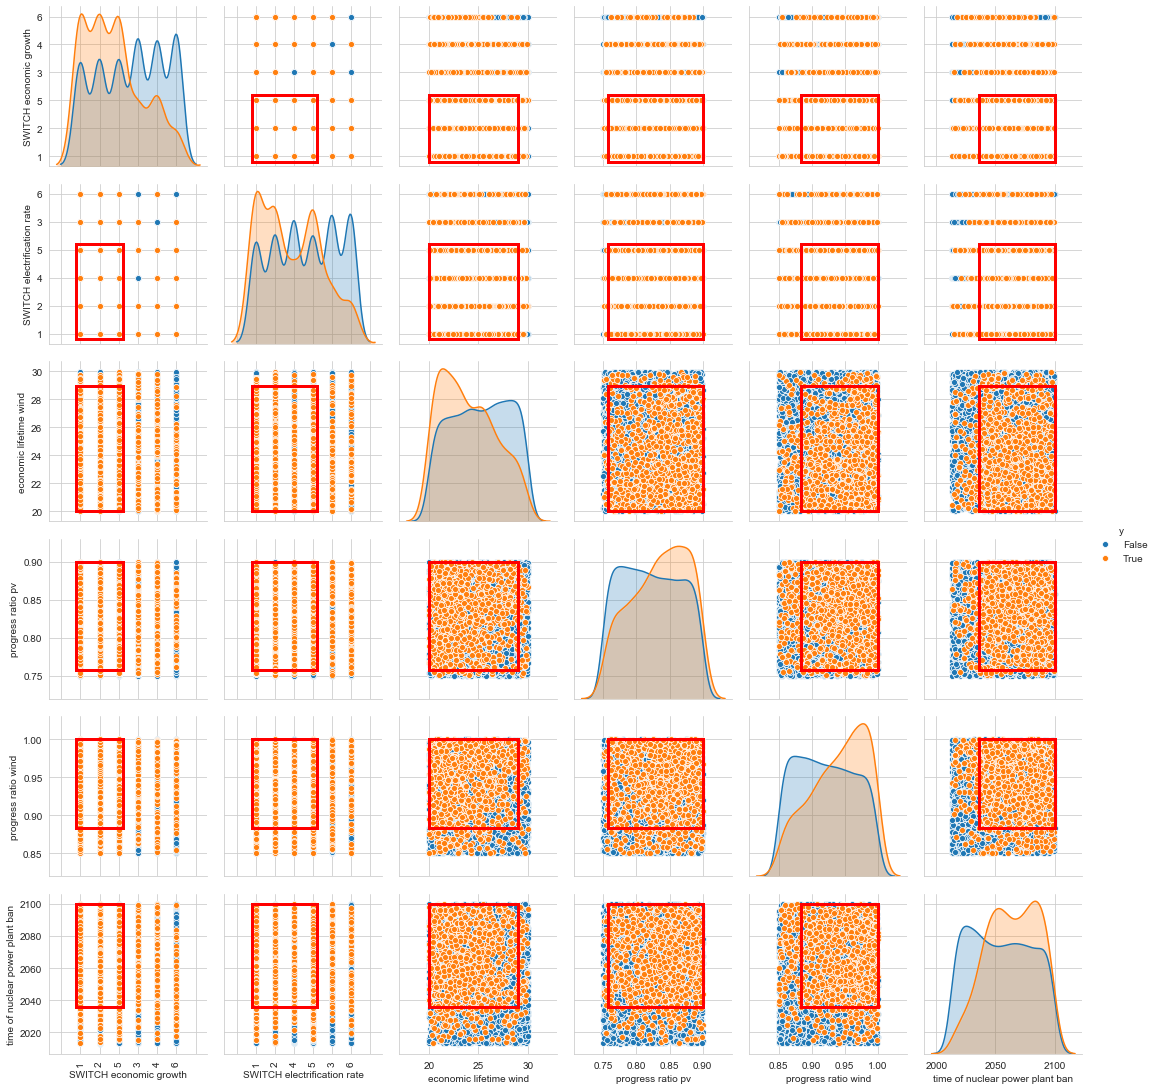

In [16]:
box1.show_pairs_scatter(19)
plt.show()

* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?

implementing this is a bit tricky. Principal components analysis is defined only for non-categorical datatypes. Or, to be even more nitpicky, only for real valued parameters. We thus need to select those columns that are non-categorical, apply PCA to this, and than add back in the categorical columns.

In [17]:
x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
x_categorical = x.select_dtypes(include=pd.CategoricalDtype)

rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, y)

In [18]:
rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)

In [19]:
prim_obj = prim.Prim(rotated_x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box1 = prim_obj.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.84375, mass: 0.0576, coverage: 0.27898966704936856, density: 0.84375 restricted_dimensions: 13


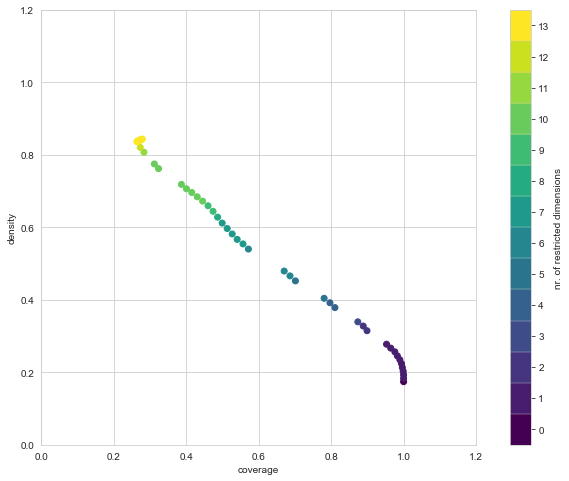

In [22]:
box1.show_tradeoff()
plt.show()

So, PCA preprocessing makes a rather big difference: we can find much higher coverage and density. Why? PCA preprocessing works if there are interaction effects amongst multiple uncertainties which joinly explain the experiments of interest. Intuitively: the cases of interest are located not in a nice box in one of the corners but are located on a diagonal. PCA helps finding a way of rotating the data such that after rotating, we can nicely put the cases of interest into an orthogonal box. The downside is that we have our box definition in the rotated space (denoted by the r_{number}).See the Dalal paper for more detail. 

just to give you a sense, below I show again the pairwise scatter, note how for the numerical uncertainties the data is clearly rotated compared to the previous pair wise plot.

SWITCH economic growth [1, 2, 3, 5, 4, 6]
SWITCH electrification rate [1, 2, 5, 3, 4, 6]
SWITCH storage for intermittent supply [1, 2, 3, 4, 5, 7, 6]


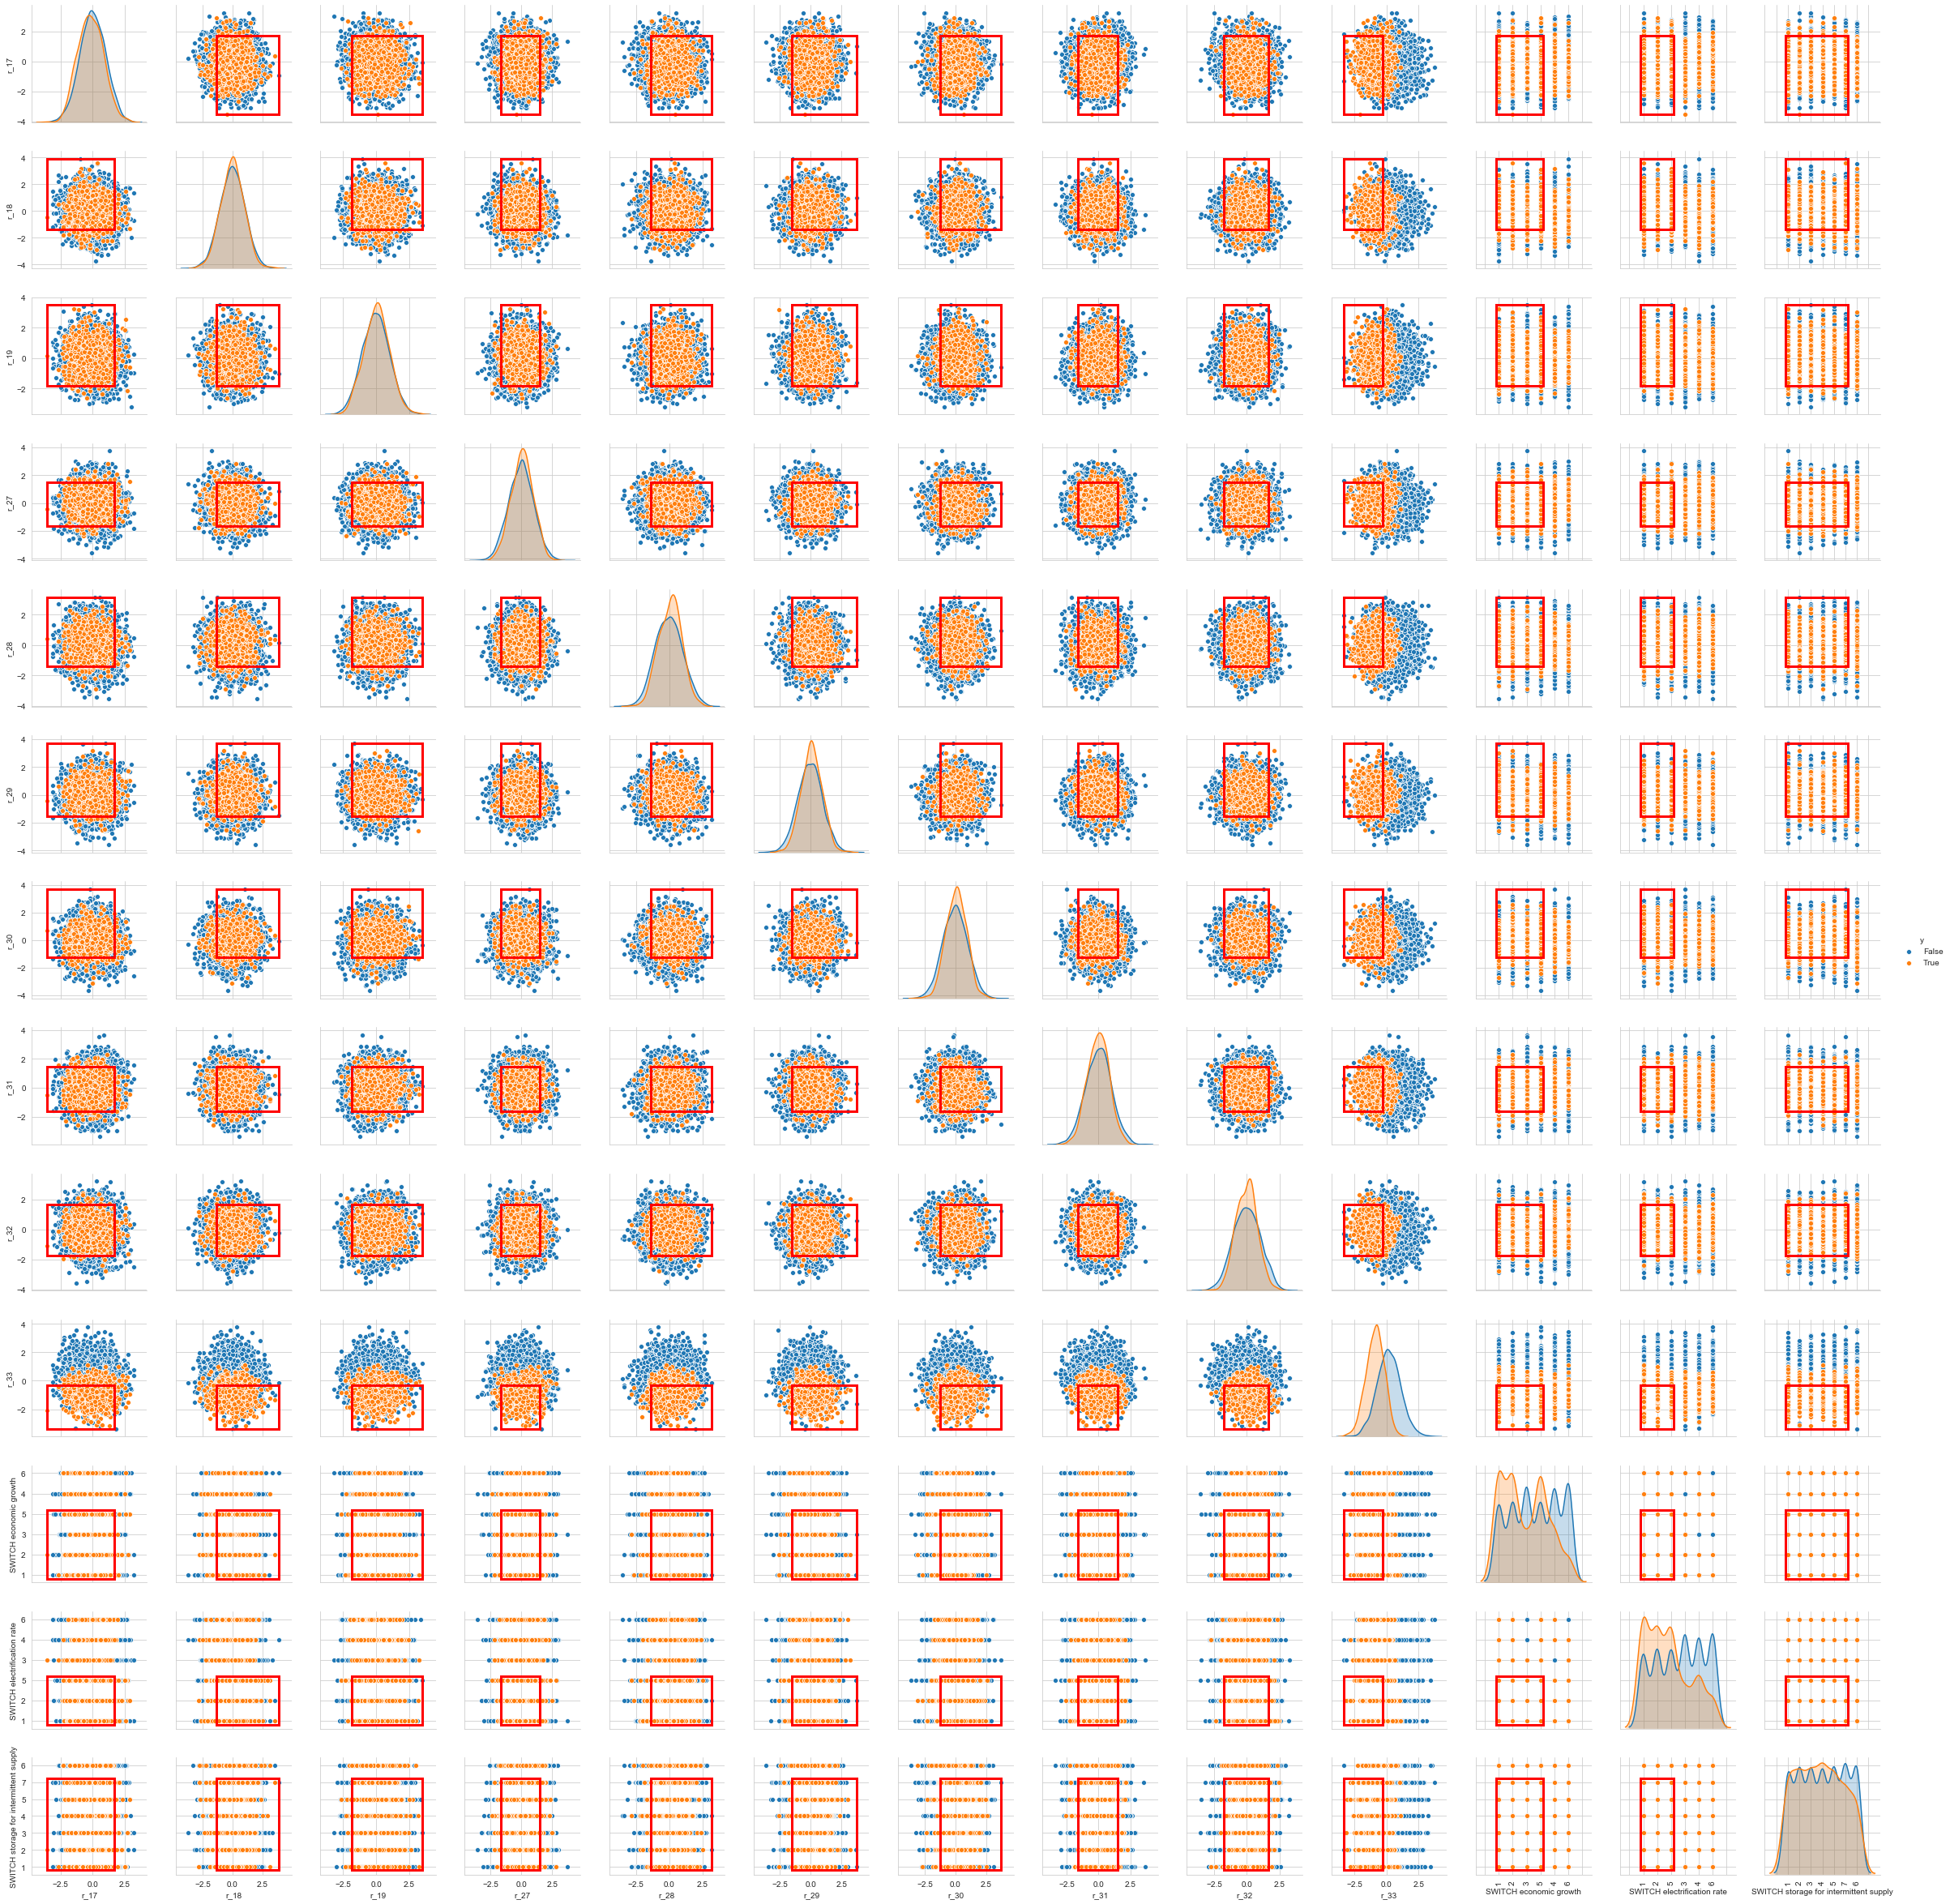

In [23]:
box1.show_pairs_scatter()
plt.show()